# 3 Tasks - To - Do:
**Please Solve all the Problems as instructed:**
# 3.1 Problem - 1: Getting Started with Data Exploration - Some Warm up
 **Exercises**:
 Data Exploration and Understanding:

• Dataset Overview:
1. Load the dataset and display the first 10 rows.


In [ ]:
import pandas as pd

# Loading the dataset
file_path = '/content/drive/MyDrive/Dataset/Copy of WHR-2024-5CS037.csv'
df = pd.read_csv(file_path)

#Displaying the first 10 rows
print(df.head(10));


  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3                    0.724              

2. Identify the number of rows and columns in the dataset.

In [ ]:
#Identifying the number of rows and columns in the dataset
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 143
Number of columns: 9


3. List all the columns and their data types.

In [ ]:
#Listing all the columns and their Data types
print(df.dtypes)

Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object


**• Basic Statistics:**
1. Calculate the mean, median, and standard deviation for the Score column.

In [ ]:
mean_score = df['score'].mean() # Finding the mean of the score and assignning it to mean_score
median_score = df['score'].median()  # Finding the median of the score and assignning it to median_score
std_dev_score = df['score'].std() # Finding the standard devaiton of the score and assignning it to std_dev_score

print("Mean Score:", mean_score)
print("Median Score:", median_score)
print("Standard Deviation of Score:", std_dev_score)

Mean Score: 5.52758041958042
Median Score: 5.785
Standard Deviation of Score: 1.1707165099442995


2. Identify the country with the highest and lowest happiness scores.

In [ ]:
#By using idxmax() it gives the highest score of then using df.loc it will locate the highest score of the country and find the  unhappiest country
happiest_country = df.loc[df['score'].idxmax(), 'Country name']
#By using idxmin() it gives the lowest score and then using df.loc it will locate the lowest score of the country and find the  unhappiest country
unhappiest_country = df.loc[df['score'].idxmin(), 'Country name']

print("Happiest Country:", happiest_country)
print("Unhappiest Country:", unhappiest_country)

Happiest Country: Finland
Unhappiest Country: Afghanistan


**• Missing Values:**
1. Check if there are any missing values in the dataset. If so, display the total count for each column.

In [ ]:
# To check the missing values in the dataset
missing_values = df.isnull().sum() #isnull() will check if there is any null in the dataframe and then the sum() will add the count of null
print(missing_values[missing_values > 0])

Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


**• Filtering and Sorting:**
1. Filter the dataset to show only the countries with a Score greater than 7.5.

In [ ]:
filtered_df = df[df['Score'] > 7.5] # Filtering the countries with score greater than 7.5

2. For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the
top 10 rows.

In [ ]:
# Filtering the GDP per capita in desceinding
top_gdp_countries = filtered_df.sort_values(by='GDP per Capita', ascending=False).head(10) # head(10) will display the top gdp countries
print(top_gdp_countries)

**• Adding New Columns:**
1. Create a new column called Happiness Category that categorizes countries into three categories
based on their Score:

Low − (Score < 4)

Medium − (4 ≤ Score ≤ 6)

High − (Score > 6)

In [ ]:
# Created a funtion that will check the Happiness and give low, medium and high based on the score.
def categorize_happiness(score):
    if score < 4:
        return 'Low'
    elif 4 <= score <= 6:
        return 'Medium'
    else:
        return 'High'

df['Happiness Category'] = df['score'].apply(categorize_happiness)
print(df[['Country name', 'score', 'Happiness Category']].head())

  Country name  score Happiness Category
0      Finland  7.741               High
1      Denmark  7.583               High
2      Iceland  7.525               High
3       Sweden  7.344               High
4       Israel  7.341               High


2. Data Visualizations

    Bar Plot: Top 10 happiest countries:

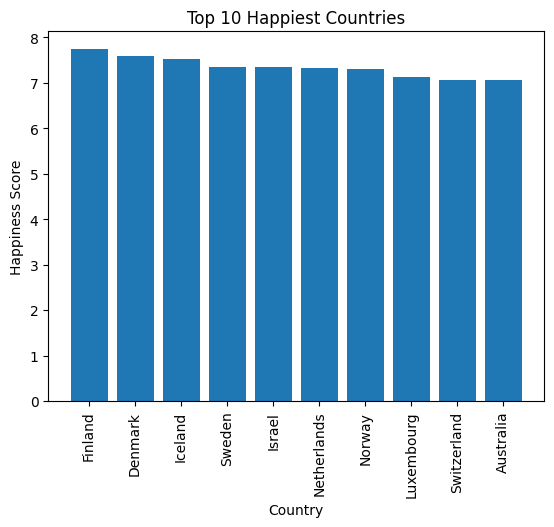

In [ ]:
import matplotlib.pyplot as plt

top_10_happiest = df.nlargest(10, 'score')
plt.bar(top_10_happiest['Country name'], top_10_happiest['score']) #using the bar() to display the bar graph of top 10 happiest countries
plt.title('Top 10 Happiest Countries')  # To display the title of the bar graph
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.xticks(rotation=90)
plt.show()

**• Line Plot:** Plot the top 10 unhappiest countries by Score using a Line chart.

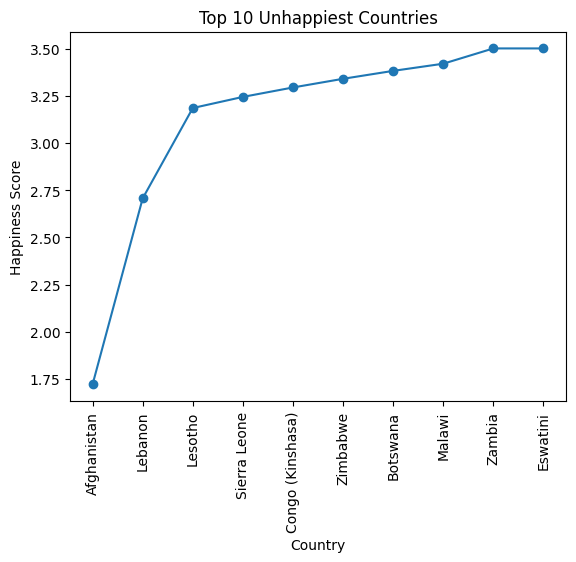

In [ ]:
# Selecting the 10 countries with the lowest happiness scores
top_10_unhappiest = df.nsmallest(10, 'score')
# for displaying the line plot to visualize the unhappiest countries and their scores
plt.plot(top_10_unhappiest['Country name'], top_10_unhappiest['score'], marker='o')
plt.title('Top 10 Unhappiest Countries') # To display the title of the line graph
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.xticks(rotation=90)
plt.show()

• Plot a histogram for the Score column to show its distribution and also interpret.

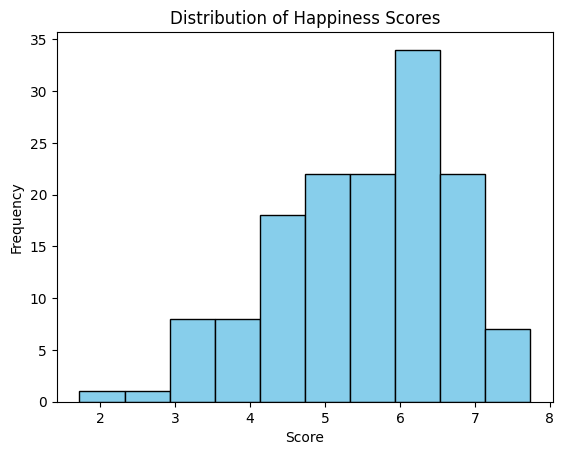

In [ ]:
# for displaying the histrogram to visualize the the distribution of happiness scores of countries
plt.hist(df['score'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Happiness Scores') # To display the title of the historgram graph
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

**• Scatter Plot:** Plot a scatter plot between GDP per Capita and Score to visualize their relationship.

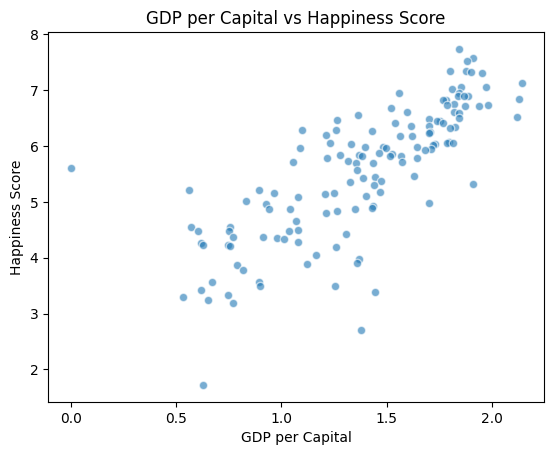

In [ ]:
# for displaying the scatter plot to visualize the GDP per Capital vs Happiness Score
plt.scatter(df['Log GDP per capita'], df['score'], alpha=0.6, edgecolors='w')
plt.title('GDP per Capital vs Happiness Score') # To display the title of the scatter graph
plt.xlabel('GDP per Capital')
plt.ylabel('Happiness Score')
plt.show()

# 3.2 Problem - 2 - Some Advance Data Exploration Task:

**Task - 1** - Setup Task - Preparing the South-Asia Dataset:

1. Define the countries in South Asia with a list for example:

south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India","Maldives", "Nepal", "Pakistan", "Srilanka"]

2. Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}
3. Save the filtered dataframe as separate CSV files for future use.

In [ ]:
#Adding the South Asia counteries in the list
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India","Maldives", "Nepal", "Pakistan", "Sri Lanka"]

#Filtering the South Asia countries dataset from the Dataset and adding the data in south_asia_df variable
south_asia_df = df[df['Country name'].isin(south_asian_countries)]

#Saving the South Asia Happiness dataframe as separate CSV files for future use.
south_asia_df.to_csv('South_Asia_Happiness.csv', index=False)

# **Task - 2 - Composite Score Ranking:**

**Tasks:**

1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the
following metrics:

Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support

+ 0.30 × Healthy Life Expectancy

In [ ]:
# To calculate the Composite Score for each country in the South Asia dataset
south_asia_df['Composite Score'] = (
    0.40 * south_asia_df['Log GDP per capita'] +
    0.30 * south_asia_df['Social support'] +
    0.30 * south_asia_df['Healthy life expectancy']
)

<ipython-input-9-d352668c49c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_df['Composite Score'] = (


2. Rank the South Asian countries based on the Composite Score in descending order.

In [ ]:
# To sort the South Asia DataFrame by the Composite Score in descending order
south_asia_df = south_asia_df.sort_values(by='Composite Score', ascending=False)
print(south_asia_df);

    Country name  score  Log GDP per capita  Social support  \
127    Sri Lanka  3.898               1.361           1.179   
92         Nepal  5.158               0.965           0.990   
125        India  4.054               1.166           0.653   
107     Pakistan  4.657               1.069           0.600   
128   Bangladesh  3.886               1.122           0.249   
142  Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
127                    0.586                         0.583       0.144   
92                     0.443                         0.653       0.209   
125                    0.417                         0.767       0.174   
107                    0.321                         0.542       0.144   
128                    0.513                         0.775       0.140   
142                    0.242                         0.000       0.091   

     Perceptions of corruption  Dystopi

3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.

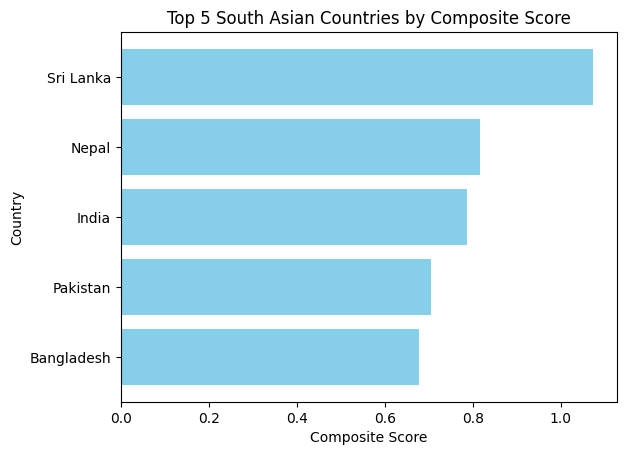

In [ ]:
import matplotlib.pyplot as plt
# To plot a horizontal bar chart for the top 5 South Asian countries by Composite Score
top_5_composite = south_asia_df.head(5)  # Selected the top 5 countries
plt.barh(top_5_composite['Country name'], top_5_composite['Composite Score'], color='skyblue') # Top create the bar chart for top 5 composite score countires
plt.title('Top 5 South Asian Countries by Composite Score') #To display the title
plt.xlabel('Composite Score')
plt.ylabel('Country')
plt.gca().invert_yaxis() # Inverting the y-axis for better ranking display
plt.show()

4. Discuss whether the rankings based on the Composite Score align with the original Score - support your
discussion with some visualization plot.

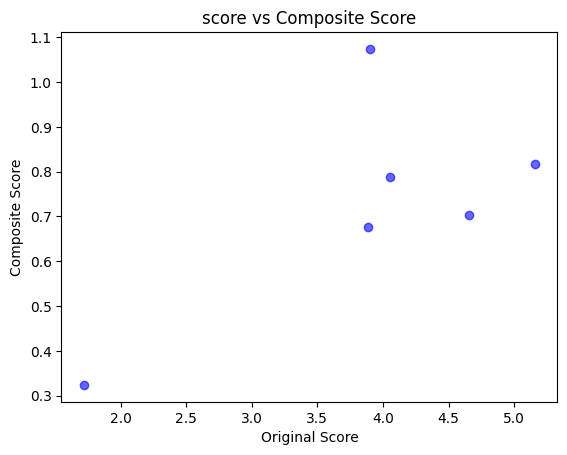

In [ ]:
# To create a scatter plot to visualize the relationship between Original Score and Composite Score
plt.scatter(south_asia_df['score'], south_asia_df['Composite Score'], color='blue', alpha=0.6)

#To add a title to the scatter plot
plt.title('Score vs Composite Score')
plt.xlabel('Original Score')
plt.ylabel('Composite Score')
plt.show()


# **Task - 3 - Outlier Detection:**
**Tasks:**

1. Identify outlier countries in South Asia based on their Score and GDP per Capita.
2. Define outliers using the 1.5 × IQR rule.

In [ ]:
# To calculate the first quartile (Q1), third quartile (Q3), and interquartile range (IQR) for the 'score' column
score_Q1 = south_asia_df['score'].quantile(0.25)  # Q1: 25th percentile of 'score'
score_Q3 = south_asia_df['score'].quantile(0.75)  # Q3: 75th percentile of 'score'
score_IQR = score_Q3 - score_Q1  # IQR: Range between Q1 and Q3

# Identifying the outliers in the 'score' column using the IQR rule
score_outliers = south_asia_df[
    (south_asia_df['score'] < (score_Q1 - 1.5 * score_IQR)) |  # It is Below lower bound
    (south_asia_df['score'] > (score_Q3 + 1.5 * score_IQR))]    # It is Above upper bound

# Calculating the first quartile (Q1), third quartile (Q3), and interquartile range (IQR) for 'Log GDP per capita'
gdp_Q1 = south_asia_df['Log GDP per capita'].quantile(0.25)  # Q1: 25th percentile of GDP
gdp_Q3 = south_asia_df['Log GDP per capita'].quantile(0.75)  # Q3: 75th percentile of GDP
gdp_IQR = gdp_Q3 - gdp_Q1  # IQR: Range between Q1 and Q3

# Identifying the outliers in the 'Log GDP per capita' column using the IQR rule
gdp_outliers = south_asia_df[
    (south_asia_df['Log GDP per capita'] < (gdp_Q1 - 1.5 * gdp_IQR)) |  # It is Below lower bound
    (south_asia_df['Log GDP per capita'] > (gdp_Q3 + 1.5 * gdp_IQR))    # It is Above upper bound
]


3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers
in a different color.

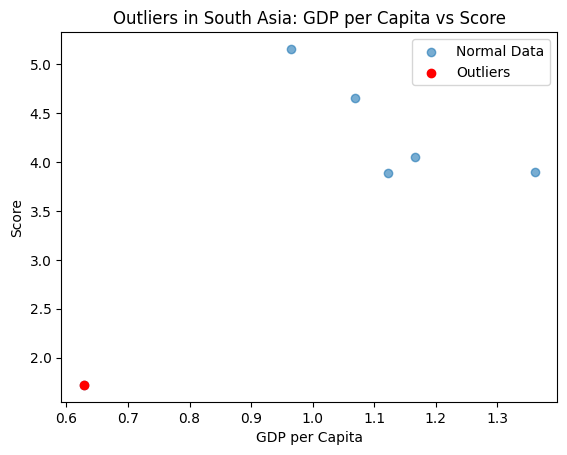

In [ ]:
# To create a scatter plot for GDP per capita vs. Score
plt.scatter(south_asia_df['Log GDP per capita'], south_asia_df['score'], label='Normal Data', alpha=0.6)
# To Highlight the outliers in red
plt.scatter(gdp_outliers['Log GDP per capita'], gdp_outliers['score'], color='red', label='Outliers')
plt.title('Outliers in South Asia: GDP per Capita vs Score')
plt.xlabel('GDP per Capita')
plt.ylabel('Score')
# Adding a legend to differentiate normal data and outliers
plt.legend()
plt.show()


4. Discuss the characteristics of these outliers and their potential impact on regional averages.

# **Task - 4 - Exploring Trends Across Metrics:**
**Tasks:**

1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation
{pearson correlation} with the Score for South Asian countries.

In [ ]:
# To calculate the correlation between 'Freedom to make life choices' and 'score'
freedom_corr = south_asia_df['Freedom to make life choices'].corr(south_asia_df['score'])

# To calculate the correlation between 'Generosity' and 'score'
generosity_corr = south_asia_df['Generosity'].corr(south_asia_df['score'])

print("Correlation with Freedom:", freedom_corr)  # Displaying the correlation for Freedom
print("Correlation with Generosity:", generosity_corr)  # Displaying the correlation for Generosity


Correlation with Freedom: 0.8005185224163315
Correlation with Generosity: 0.874512371253192


2. Create scatter plots with trendlines for these metrics against the Score.

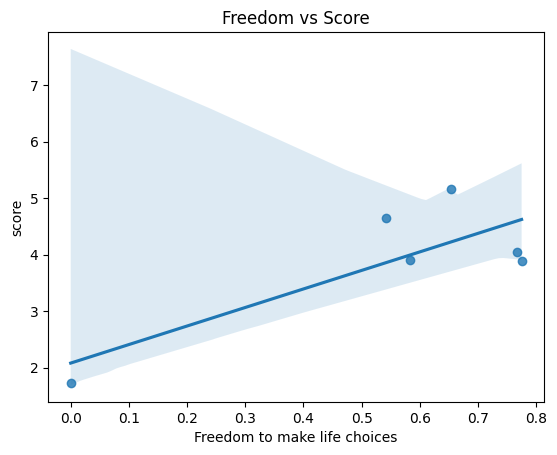

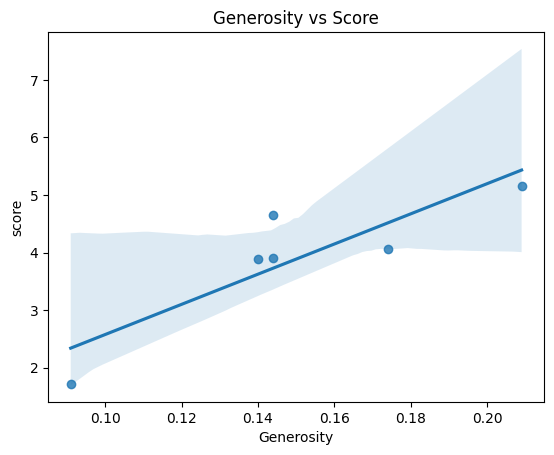

In [ ]:
import seaborn as sns
# To create a regression plot for 'Freedom to make life choices' vs. 'score'
sns.regplot(x='Freedom to make life choices', y='score', data=south_asia_df)
plt.title('Freedom vs Score')  # Add a title to the plot
plt.show()  # Display the plot

# To create a regression plot for 'Generosity' vs. 'score'
sns.regplot(x='Generosity', y='score', data=south_asia_df)
plt.title('Generosity vs Score')  # Adding a title to scatter plot
plt.show()


3. Identify and discuss the strongest and weakest relationships between these metrics and the Score for
South Asian countries.

# **Task - 5 - Gap Analysis:**
**Tasks:**

1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score
for each South Asian country.

In [ ]:
# To calculate the difference between 'Log GDP per capita' and 'score' and store it in a new column called 'GDP-Score Gap'
south_asia_df['GDP-Score Gap'] = south_asia_df['Log GDP per capita'] - south_asia_df['score']

2. Rank the South Asian countries by this gap in both ascending and descending order.

In [ ]:
# To sort the DataFrame by 'GDP-Score Gap' in ascending order and store it in south_asia_df_asc
south_asia_df_asc = south_asia_df.sort_values(by='GDP-Score Gap', ascending=True)

#To sort the DataFrame by 'GDP-Score Gap' in descending order and store it in south_asia_df_desc
south_asia_df_desc = south_asia_df.sort_values(by='GDP-Score Gap', ascending=False)

# Printing the rank of South Asian countries by the 'GDP-Score Gap' in ascending order
print("The rank of South Asian Countries by the Gap in Ascending order are :-\n", south_asia_df_asc['GDP-Score Gap'])

# Printing the rank of South Asian countries by the 'GDP-Score Gap' in descending order
print("The rank of South Asian Countries by the Gap in Descending order are :-\n", south_asia_df_desc['GDP-Score Gap'])


The rank of South Asian Countires by the Gap in Ascending order are :-
 92    -4.193
107   -3.588
125   -2.888
128   -2.764
127   -2.537
142   -1.093
Name: GDP-Score Gap, dtype: float64
The rank of South Asian Countires by the Gap in Decending order are :-
 142   -1.093
127   -2.537
128   -2.764
125   -2.888
107   -3.588
92    -4.193
Name: GDP-Score Gap, dtype: float64


3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.

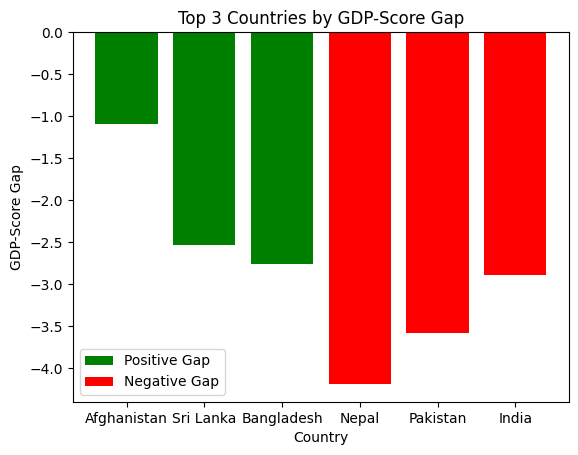

In [ ]:
# To select the top 3 countries with the highest GDP-Score Gap (positive gap)
top_3_positive = south_asia_df_desc.head(3)

# To select the top 3 countries with the lowest GDP-Score Gap (negative gap)
top_3_negative = south_asia_df_asc.head(3)

# To create a bar plot for the top 3 countries with a positive GDP-Score Gap (green bars)
plt.bar(top_3_positive['Country name'], top_3_positive['GDP-Score Gap'], color='green', label='Positive Gap')

# To create a bar plot for the top 3 countries with a negative GDP-Score Gap (red bars)
plt.bar(top_3_negative['Country name'], top_3_negative['GDP-Score Gap'], color='red', label='Negative Gap')
plt.title('Top 3 Countries by GDP-Score Gap')
plt.xlabel('Country')
plt.ylabel('GDP-Score Gap')

# Adding a legend to differentiate between positive and negative gaps
plt.legend()
plt.show()


4. Analyze the reasons behind these gaps and their implications for South Asian countries.

# **3.3 Problem - 3 - Comparative Analysis:**
# Task - 1 - Setup Task - Preparing the Middle Eastern Dataset:
**Tasks:**

1. Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the
following list:

middle east countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan","Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria","United Arab Emirates", "Yemen"]

In [ ]:
# Defining the Middle Eastern countries
middle_east_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan",
                         "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
                         "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]

# Filtering the dataset for Middle Eastern countries for the data frames
middle_east_df = df[df['Country name'].isin(middle_east_countries)]

# Saving the filtered dataset as a CSV file
middle_east_df.to_csv("Middle_East_Happiness.csv", index=False)

# Display the filtered dataset
print("Filtered Middle Eastern Dataset:")
print(middle_east_df)

Filtered Middle Eastern Dataset:
             Country name  score  Log GDP per capita  Social support  \
4                  Israel  7.341               1.803           1.513   
12                 Kuwait  6.951               1.845           1.364   
21   United Arab Emirates  6.733               1.983           1.164   
27           Saudi Arabia  6.594               1.842           1.361   
61                Bahrain  5.959                 NaN             NaN   
91                   Iraq  5.166               1.249           0.996   
99                   Iran  4.923               1.435           1.136   
124                Jordan  4.186               1.262           0.983   
132                 Yemen  3.561               0.671           1.281   
141               Lebanon  2.707               1.377           0.577   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
4                      0.740                         0.641       0.153   
12                     0.6

# Complete the following task:
**1. Descriptive Statistics:**

• Calculate the mean, Standard deviation of the score for both South Asia and Middle East.

• Which region has higher happiness Scores on average?


In [ ]:
# Calculating the mean and standard deviation of the 'score' for South Asia
sa_mean = south_asia_df['score'].mean()  # Mean score for South Asia
sa_std = south_asia_df['score'].std()    # Standard deviation for South Asia

# Calculating the mean and standard deviation of the 'score' for the Middle East
me_mean = middle_east_df['score'].mean()  # Mean score for the Middle East
me_std = middle_east_df['score'].std()    # Standard deviation for the Middle East

# Printing the calculated statistics for both regions
print(f"South Asia - Mean Score: {sa_mean}, Std Dev: {sa_std}")
print(f"Middle East - Mean Score: {me_mean}, Std Dev: {me_std}")

# Comparing the average happiness scores between South Asia and the Middle East
if sa_mean > me_mean:
    print("South Asia has a higher average happiness score.")
else:
    print("Middle East has a higher average happiness score.")


South Asia - Mean Score: 3.895666666666667, Std Dev: 1.1770690152521501
Middle East - Mean Score: 5.412100000000001, Std Dev: 1.5662011684327144
Middle East has a higher average happiness score.


 **2. Top and Bottom Performers:**

• Identify the top 3 and bottom 3 countries in each region based on the score.

• Plot bar charts comparing these charts.

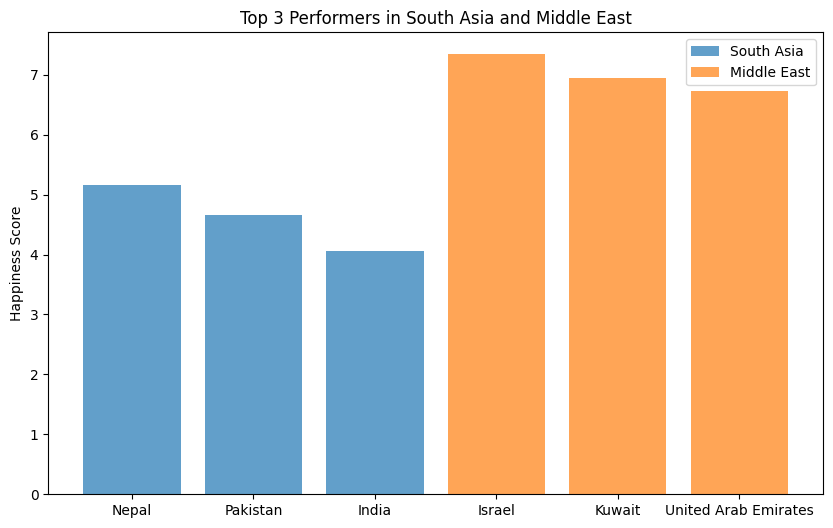

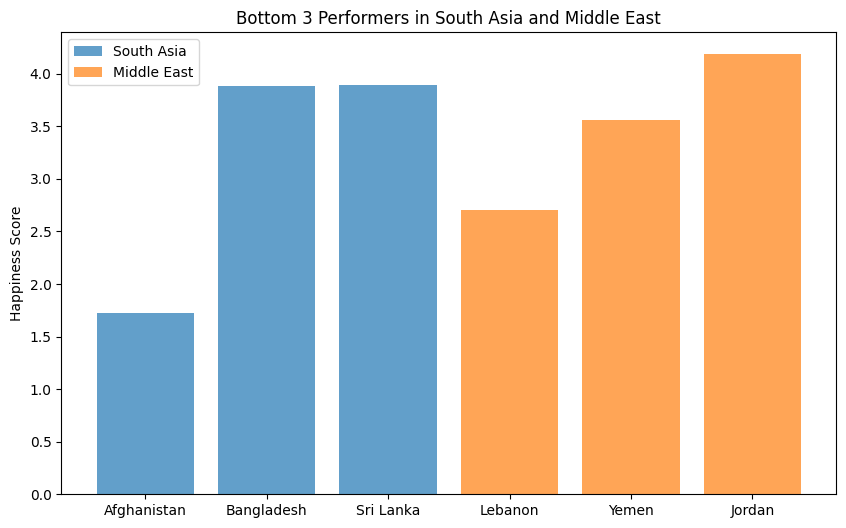

In [ ]:
import matplotlib.pyplot as plt

# Top 3 and Bottom 3 Performers for South Asia
sa_top3 = south_asia_df.nlargest(3, 'score')
sa_bottom3 = south_asia_df.nsmallest(3, 'score')

# Top 3 and Bottom 3 Performers for Middle East
me_top3 = middle_east_df.nlargest(3, 'score')
me_bottom3 = middle_east_df.nsmallest(3, 'score')


# Top 3 performers comparison
plt.figure(figsize=(10, 6))  # Seting the figure size for better visibility
# To plot the top 3 countries in South Asia
plt.bar(sa_top3['Country name'], sa_top3['score'], label="South Asia", alpha=0.7)
# To plot the top 3 countries in the Middle East
plt.bar(me_top3['Country name'], me_top3['score'], label="Middle East", alpha=0.7)
plt.title("Top 3 Performers in South Asia and Middle East")  # Title for the plot
plt.ylabel("Happiness Score")
plt.legend()  # Displaying the legend to differentiate South Asia and Middle East
plt.show()

# Bottom 3 performers comparison
plt.figure(figsize=(10, 6))  # Seting the figure size for better visibility
# To plot the bottom 3 countries in South Asia
plt.bar(sa_bottom3['Country name'], sa_bottom3['score'], label="South Asia", alpha=0.7)
# To plot the bottom 3 countries in the Middle East
plt.bar(me_bottom3['Country name'], me_bottom3['score'], label="Middle East", alpha=0.7)
plt.title("Bottom 3 Performers in South Asia and Middle East")  # Title for the plot
plt.ylabel("Happiness Score")
plt.legend()  # Displaying the legend to differentiate South Asia and Middle East
plt.show()



**3. Metric Comparisons:**

• Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy
between the regions using grouped bar charts.

• Which metrics show the largest disparity between the two regions?

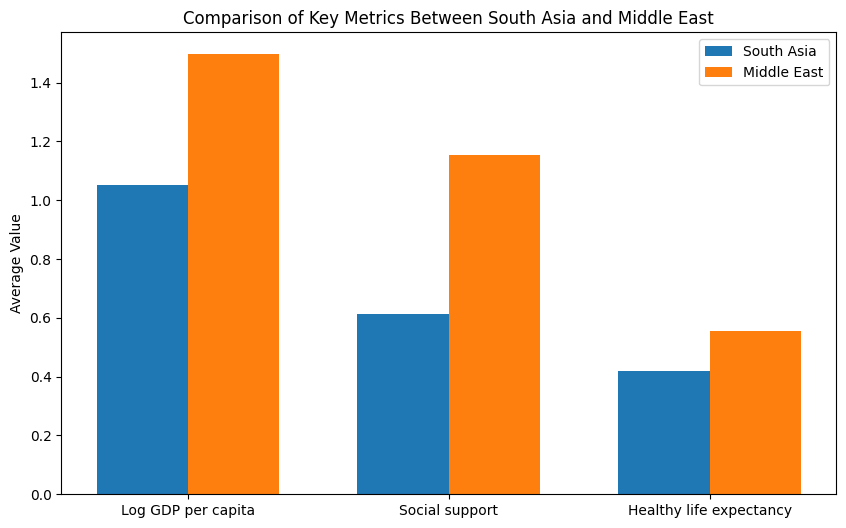

In [ ]:
import numpy as np

# Comparing the metrics: Log GDP per capita, Social support, Healthy life expectancy
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']

# Calculating the mean for each metric in both regions
sa_means = south_asia_df[metrics].mean()
me_means = middle_east_df[metrics].mean()

# Defining the x-axis positions based on the number of metrics
x = np.arange(len(metrics))

# Seting the width of the bars for better visualization
width = 0.35

# Creating a bar plot to compare the average values of key metrics for South Asia and Middle East
plt.figure(figsize=(10, 6))  # Seting the figure size for better visibility
# To plot the bars for South Asia, adjusting the position to the left
plt.bar(x - width/2, sa_means, width, label="South Asia")
# To plot the bars for the Middle East, adjusting the position to the right
plt.bar(x + width/2, me_means, width, label="Middle East")
# Seting the x-ticks to represent the metrics on the x-axis
plt.xticks(x, metrics)
plt.ylabel("Average Value")
# Seting the title of the plot to reflect the comparison
plt.title("Comparison of Key Metrics Between South Asia and Middle East")
# Display the legend to differentiate between the two regions
plt.legend()
plt.show()


**4. Happiness Disparity:**

• Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.

• Which region has greater variability in happiness?

In [ ]:
# Computing the range for South Asia (difference between the maximum and minimum scores)
sa_range = south_asia_df['score'].max() - south_asia_df['score'].min()

# Computing the range for the Middle East (difference between the maximum and minimum scores)
me_range = middle_east_df['score'].max() - middle_east_df['score'].min()

# Computing the Coefficient of Variation (CV) for South Asia (standard deviation divided by the mean)
sa_cv = sa_std / sa_mean

# Computing the Coefficient of Variation (CV) for the Middle East
me_cv = me_std / me_mean

# Printing the computed range and CV for both regions
print(f"South Asia - Range: {sa_range}, CV: {sa_cv}")
print(f"Middle East - Range: {me_range}, CV: {me_cv}")

# Comparing the variability in happiness (CV) between South Asia and the Middle East
if sa_cv > me_cv:
    print("South Asia has greater variability in happiness.")
else:
    print("Middle East has greater variability in happiness.")


South Asia - Range: 3.4370000000000003, CV: 0.30214828833374263
Middle East - Range: 4.634, CV: 0.28938880812119405
South Asia has greater variability in happiness.


**5. Correlation Analysis:**

• Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and
Generosity within each region.

• Create scatter plots to visualize and interpret the relationships.

South Asia Correlations:
Freedom to make life choices    0.800519
Generosity                      0.874512
score                           1.000000
Name: score, dtype: float64

Middle East Correlations:
Freedom to make life choices    0.863220
Generosity                      0.627524
score                           1.000000
Name: score, dtype: float64


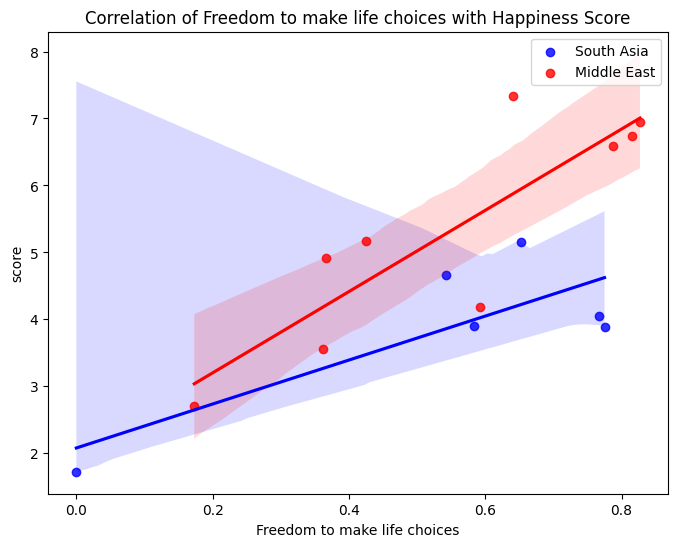

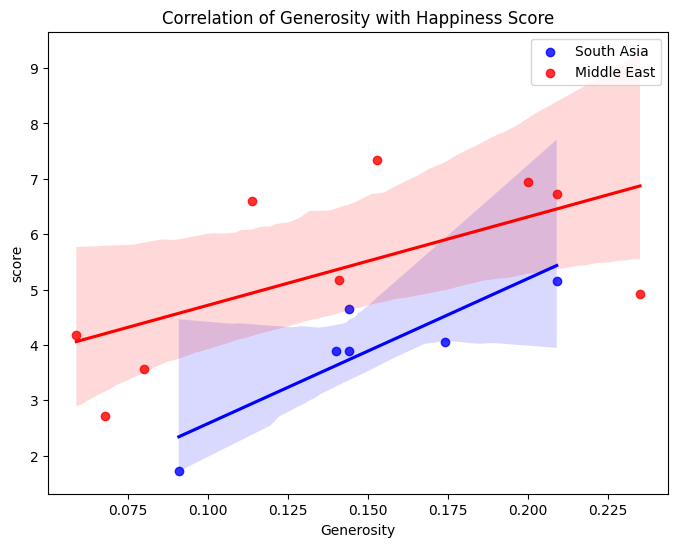

In [ ]:
# To list of metrics to correlate with the happiness score
metrics_to_correlate = ['Freedom to make life choices', 'Generosity']

# Computing the correlation of the selected metrics with the happiness score for South Asia
sa_correlations = south_asia_df[metrics_to_correlate + ['score']].corr()['score']

# Computing the correlation of the selected metrics with the happiness score for the Middle East
me_correlations = middle_east_df[metrics_to_correlate + ['score']].corr()['score']

print("South Asia Correlations:")
print(sa_correlations)

print("\nMiddle East Correlations:")
print(me_correlations)

import seaborn as sns
import matplotlib.pyplot as plt

# Looping through the metrics and create scatter plots with regression lines
for metric in metrics_to_correlate:
    plt.figure(figsize=(8, 6))  # Seting the figure size for clarity

    #To plot the correlation for South Asia (in blue)
    sns.regplot(data=south_asia_df, x=metric, y='score', label="South Asia", color='blue')

    # To plot the correlation for the Middle East (in red)
    sns.regplot(data=middle_east_df, x=metric, y='score', label="Middle East", color='red')

    # Seting the title for each plot
    plt.title(f"Correlation of {metric} with Happiness Score")

    # Displaying the legend to distinguish between South Asia and Middle East
    plt.legend()

    plt.show()


**6. Outlier Detection:**

• Identify outlier countries in both regions based on Score and GDP per Capita.

• Plot these outliers and discuss their implications.

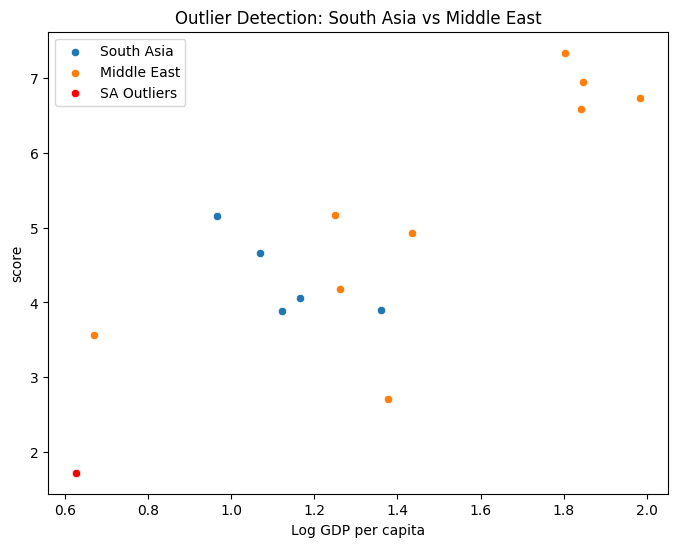

In [ ]:
# Defining a function to detect outliers based on the IQR method
def detect_outliers(df, column):
    # Calculating the first (Q1) and third (Q3) quartiles of the column
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calculating the interquartile range (IQR)
    IQR = Q3 - Q1

    #To return the rows where the column values are outside the acceptable range (outliers)
    return df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]

# To detect outliers in South Asia based on the 'score' column
sa_outliers = detect_outliers(south_asia_df, 'score')
# To detect outliers in the Middle East based on the 'score' column
me_outliers = detect_outliers(middle_east_df, 'score')

# To create a plot to visualize the outliers
plt.figure(figsize=(8, 6))
# Ploting the data points for South Asia with the 'Log GDP per capita' vs 'score'
sns.scatterplot(data=south_asia_df, x='Log GDP per capita', y='score', label="South Asia")
# Ploting the data points for the Middle East with the 'Log GDP per capita' vs 'score'
sns.scatterplot(data=middle_east_df, x='Log GDP per capita', y='score', label="Middle East")
# To Highlight the outliers in South Asia using red color
sns.scatterplot(data=sa_outliers, x='Log GDP per capita', y='score', label="SA Outliers", color='red')
# To highlight the outliers in the Middle East using orange color
sns.scatterplot(data=me_outliers, x='Log GDP per capita', y='score', label="ME Outliers", color='orange')
# Seting the title for the plot
plt.title("Outlier Detection: South Asia vs Middle East")
# Displaying the legend to distinguish between the regions and outliers
plt.legend()
plt.show()


**7. Visualization:**

• Create boxplots comparing the distribution of Score between South Asia and the Middle East.

• Interpret the key differences in distribution shapes, medians, and outliers.

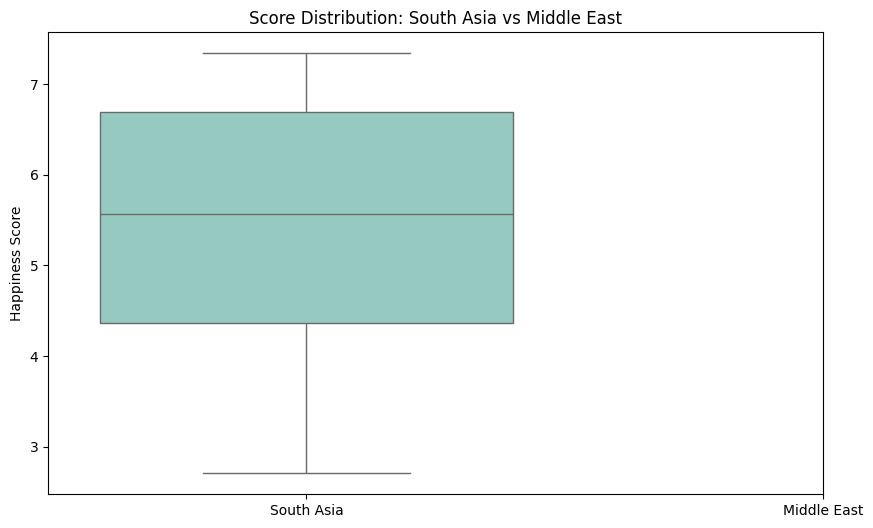

4      7.341
12     6.951
21     6.733
27     6.594
61     5.959
91     5.166
99     4.923
124    4.186
132    3.561
141    2.707
Name: score, dtype: float64


In [ ]:
# To create a boxplot to compare the score distributions between South Asia and the Middle East
plt.figure(figsize=(10, 6))

# To generate a boxplot for happiness scores in both South Asia and the Middle East
sns.boxplot(data=[south_asia_df['score'], middle_east_df['score']], palette="Set3")

# Seting the x-axis labels to distinguish between South Asia and the Middle East
plt.xticks([0, 1], ['South Asia', 'Middle East'])
plt.title("Score Distribution: South Asia vs Middle East")
plt.ylabel("Happiness Score")
plt.show()
